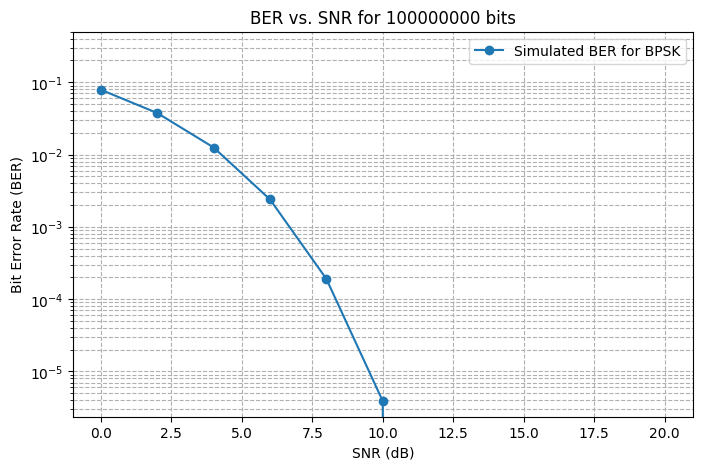

In [1]:
#############################################################################################
#                                                                                           #
#               =============================================================               #
#                    Section 2: +1,-1 Signal Mapping (BPSK) Simulation                      #
#               -------------------------------------------------------------               #
#                                                                                           #
#   In this simulation:                                                                     #
#       - Bits are generated randomly (0s and 1s)                                           #
#       - Mapping (BPSK-like):                                                              #
#           • Bit 0 is mapped to +amplitude (where amplitude = √power)                      #
#           • Bit 1 is mapped to -amplitude                                                 #
#       - With the symbols centered around zero, the detection threshold is set to 0.       #
#       - AWGN is added (with the same noise variance calculation as before).               #
#       - The received signal is the sum of the transmitted symbol and noise.               #
#       - The detection decision:                                                           #
#           • If the received signal is ≥ 0, it is decoded as 0.                            #
#           • If the received signal is < 0, it is decoded as 1.                            #
#       - The BER is computed by comparing the decoded bits with the original bits.         #
#                                                                                           #
# ###########################################################################################

import numpy as np
import matplotlib.pyplot as plt


num_bits = 100000000                                      # The total number of bits to simulate; ---> a higher number gives smoother BER curves
power = 1e-7                                            # Signal power at the receiver (This is used for scaling the transmitted symbols)
voltage = np.sqrt(power)
SNR_dB_values = np.arange(0, 21, 2)                    # Used for SNR values from 10 dB to 20 dB in 2 dB steps
ber_values = []                                         # Creates empty list used for the BER for the BPSK mapping scheme (0 -> +amplitude, 1 -> -amplitude)
amplitude = voltage                                     # Amplitude will be used for BPSK mapping, I will use the same amplitude (±√power).

for snr_db in SNR_dB_values:                            # Loops over each SNR value to compute the BER for BPSK mapping at each noise level

    snr_linear = 10**(snr_db / 10)                      # Converts the current SNR from dB to linear scale using equation: SNR_linear = 10^(SNR_dB/10)

    noise_variance = power / snr_linear                 # Computes noise variance using the relation: SNR_linear = signal power / noise variance  ==> noise_variance = power / SNR_linear
    # print(noise_variance)                             # Debug
    bits = np.random.randint(0, 2, num_bits)            # Generates a random array of bits (0's and 1's) that will be checked against later (will be unique each run)

    transmitted_signal = np.where(bits == 0, amplitude, -amplitude)     # For every element in 'bits' that equals 0, the output is 'amplitude'
                                                                        # For every element in 'bits' that is not 0 (i.e., equals 1), the output is '-amplitude'

    noise_real = (1/np.sqrt(2)) * (np.random.normal(0, np.sqrt(noise_variance), num_bits))      # Generates (real) AWGN with zero mean and standard deviation sqrt(noise_variance)
    noise_img = (1/np.sqrt(2)) * (np.random.normal(0, np.sqrt(noise_variance), num_bits))       # Generates (imaginary) AWGN with zero mean and standard deviation sqrt(noise_variance)

    noise = (noise_real + 1j * noise_img)                               # Combines both real and imaginary noise into one variable

    received_signal = transmitted_signal + noise                        # Received signal for BPSK: transmitted signal plus noise
    received_signal_1 = np.real(received_signal)

    decoded_bits = (received_signal_1 < 0).astype(int)                  # Since the symbols are centered around zero, I use 0 as the threshold. If received signal is < 0, it is decoded as '1' (because -amplitude corresponds to bit 1)

    bit_errors = np.sum(decoded_bits != bits)                           # Uses np.sum to add up all the error bits by checking if the decoded_bits are not equal to the bits from the start.
    ber = bit_errors / num_bits                                         # Bit Error Rate Calculation
    ber_values.append(ber)                                              # Appends the ber_values list with each iteration of the for loop

#     print(ber_values)

plt.figure(figsize=(8, 5))                                                       # Creates a new figure for the BER vs. SNR plot
plt.semilogy(SNR_dB_values, ber_values, 'o-', label='Simulated BER for BPSK')    # Plots the BER for the BPSK mapping scheme using a semilogarithmic scale (y-axis is logarithmic)
plt.ylim(top=0.5)                                                                # Sets the y-axis max limit to 0.5 due to this being the absolute worst case you could have.
plt.xlabel('SNR (dB)')                                                           # Labels the X axis
plt.ylabel('Bit Error Rate (BER)')                                               # Labels the Y axis
plt.title(f'BER vs. SNR for {num_bits} bits')                                    # Title for the plot
plt.grid(True, which='both', linestyle='--')                                     # Adds how the line is plotted and includes a grid for readability
plt.legend()                                                                     # Adds a legend to the plot
plt.show()                                                                       # Allows the plot to show up for the user
